In [2]:
import pandas as pd

In [199]:
def read_textfile(filename):
    list_acc = []
    list_mag = []
    list_gyr = []

    with open(filename, "r") as f:
        data = f.readlines()

    for line in data:
        values = line.split("\t")[1:4]
        values[2] = values[2].strip("\n").strip("}").strip('"')
        values = list(map(float, values))
        if "acc" in line:
            list_acc.append(values)
        if "mag" in line:
            list_mag.append(values)
        if "gyr" in line:
            list_gyr.append(values)

    return pd.DataFrame(list_acc, columns=["ax", "ay", "az"]), \
        pd.DataFrame(list_mag, columns=["mx", "my", "mz"]), \
        pd.DataFrame(list_gyr, columns=["gx", "gy", "gz"]),


In [200]:
df_acc1, df_mag1, df_gyr1 = read_textfile('sensor-data1.txt')
df_acc2, df_mag2, df_gyr2 = read_textfile('sensor-data2.txt')
df_acc3, df_mag3, df_gyr3 = read_textfile('sensor-data3.txt')


In [212]:
df_acc = df_acc1.append(df_acc2, ignore_index=True).append(df_acc3, ignore_index=True)
df_mag = df_mag1.append(df_mag2, ignore_index=True).append(df_mag3, ignore_index=True)
df_gyr = df_gyr1.append(df_gyr2, ignore_index=True).append(df_gyr3, ignore_index=True)

Text(0, 0.5, 'm/s²')

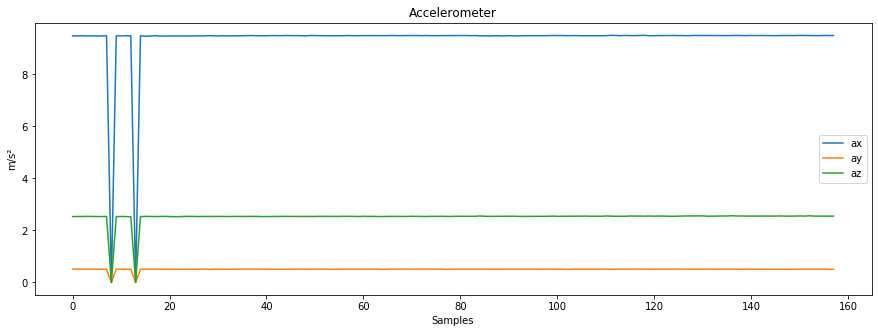

In [223]:
plot = df_acc.plot(figsize=(15,5), title='Accelerometer')
plot.set_xlabel('Samples')
plot.set_ylabel('m/s²')

Text(0, 0.5, 'μT')

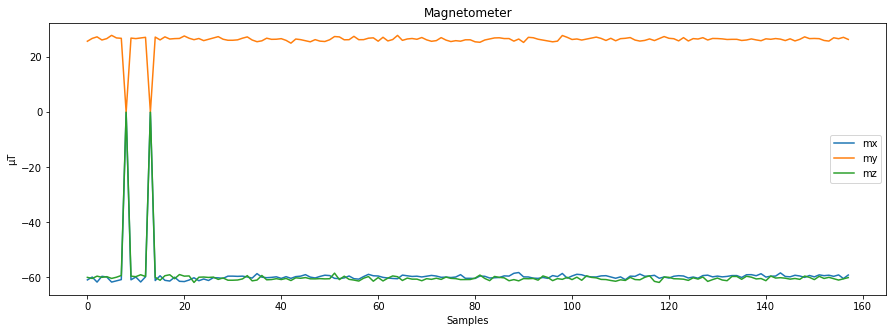

In [224]:
plot = df_mag.plot(figsize=(15,5), title='Magnetometer')
plot.set_xlabel('Samples')
plot.set_ylabel('μT')

Text(0, 0.5, 'rad/s')

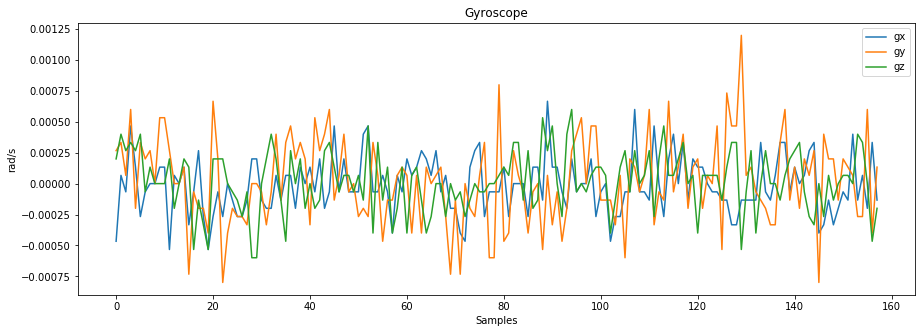

In [226]:
plot = df_gyr.plot(figsize=(15,5), title='Gyroscope')
plot.set_xlabel('Samples')
plot.set_ylabel('rad/s')